<a href="https://colab.research.google.com/github/pabloecheg/Integracion-de-Datos/blob/main/Caracterizacion_VA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caracterización Experimental de Variables

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns #Libreria para la grafica de distribuciones

#Para carga automatica de los datos
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Se procede con la carga de los datos


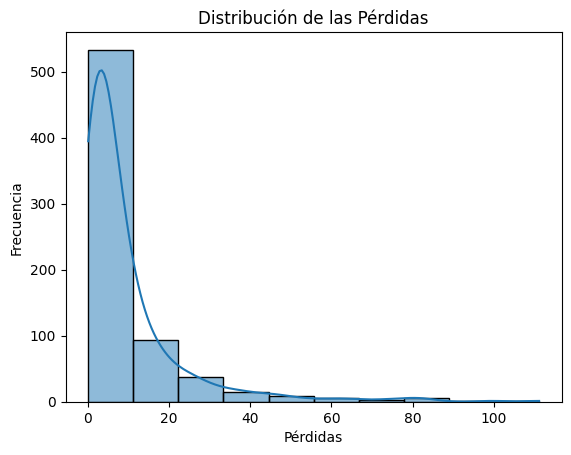

In [6]:
nxl = '/content/drive/MyDrive/Integracion y Prospectiva/Ejercicio Fallas Colab/3. FallasTecnologicas (2).xlsx'
xdb = pd.read_excel(nxl, sheet_name=0)
xdb.dropna()
xdb.head(10)

#Tomamos las variables de interés
xev = xdb.iloc[:,3] #Variable Eventos Semanales
xsev = xdb.iloc[:,4] #Perdidas Promedio por Evento
LDA = np.multiply(xev,xsev)

#Graficamos la Distribución de las Perdidas
plt.figure()
sns.histplot(LDA, kde=True, bins=10, ) #bins: agrupar los datos en 10 intervalos
plt.xlabel("Pérdidas")  # Etiqueta del eje x
plt.ylabel("Frecuencia") # Etiqueta del eje y
plt.title("Distribución de las Pérdidas") # Título del gráfico
plt.show()

2. Caracterización de las Perdidas

In [7]:
counts,bin_edges = np.histogram(LDA, bins=10)
print('Los datos por intervalo son:\n', counts) # Limites de los Intervalos
print('Los limites de los intervalos son:\n', bin_edges) #Cuantos datos hay por intervalo

#Los Valores Centrales - Marcas de Clase
mc = (bin_edges[:-1]+bin_edges[1:])/2 #Limites inferiores [:-1] / Limites Superiores bin_edges [1:]
print("Los valores centrales de las clases son:\n", mc)

#Cuantos datos hay por intervalo
fp = counts/sum(counts)
print("Los datos por intervalo son:\n", fp)

#2. Se procede con el calculo de las medidas de tendencia central
#Media, Varianza, Coeficiente de Asimetria, Kurtosis
u = np.sum(np.multiply(mc,fp))
print("la media de los datos es:", u)

#3. Desviacion-Estandar (Varianza)
var=np.sum(np.multiply((mc-u)**2, fp))
print("la varianza de los datos es:", var)
std=np.sqrt(var)
print("la desviacion estandar de los datos es:", std)

#4. Coeficiente de Asimetría
cas = np.sum(np.multiply(((mc-u)/std)**3, fp))
print("El coeficiente de asimetria de los datos es:", cas)

#5. Coeficiente de Kurtosis
ck = np.sum(np.multiply(((mc-u)/std)**4,fp))
ck=ck-3
print("El Coeficiente de Kurtosis es:", ck)

Los datos por intervalo son:
 [533  93  37  14   9   5   3   5   1   1]
Los limites de los intervalos son:
 [  0.1423   11.23637  22.33044  33.42451  44.51858  55.61265  66.70672
  77.80079  88.89486  99.98893 111.083  ]
Los valores centrales de las clases son:
 [  5.689335  16.783405  27.877475  38.971545  50.065615  61.159685
  72.253755  83.347825  94.441895 105.535965]
Los datos por intervalo son:
 [0.76034237 0.13266762 0.05278174 0.01997147 0.0128388  0.00713267
 0.0042796  0.00713267 0.00142653 0.00142653]
la media de los datos es: 11.07019634094151
la varianza de los datos es: 170.14888945066892
la desviacion estandar de los datos es: 13.044113210589247
El coeficiente de asimetria de los datos es: 3.58241551867726
El Coeficiente de Kurtosis es: 15.266617247076208


## Analisis de Resultados
En la base de datos se cuenta con un total de 701 registros de perdida asociados con las operaciones a traves de canales electronicos de una FINTECH. Estos registros nos arrojan como resultado una confiabilidad en la estimación de los estadísticos del 99% de acuerdo con la teoría de los percentiles. En la gráfica anterior, podemos observar que la distribución presenta estructura de cola larga, esto promovido por un coeficiente de asimetria positivo aproximadamente 3.58, y un coeficiente de kurtosis aproximadamente de 15 unidades, lo que indica que la mayoría de los datos se encuentran muy concentradis alrededor de la media, en un 76% aproximadamente. Esta estructura muestra claramente que los eventos de perdida extremos son muy escasos, lo que indica una baja exposicion al riesgo.  


3. Se procede con el muestreo de la variable aleatoria de peridas

El coeficiente de asimetria de los datos es: [3.40725062]
El Coeficiente de Kurtosis es: [10.89959945]
La variacion del Coeficiente de asimetria de los datos es: [0.04889575]
La variación del Coeficiente de Kurtosis es: [0.28605013]


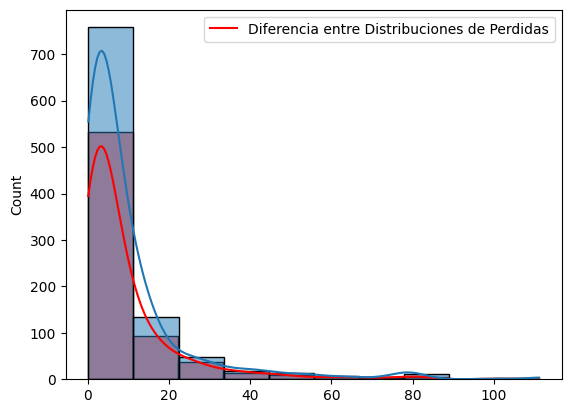

In [18]:
from scipy.stats import skew, kurtosis
#0. Preparar la variable para el muestreo
LDAdf = pd.DataFrame(LDA)

#1. Se procede con el muestreo - se van a repetir numeros de los 349
LDAs = LDAdf.sample(n=1000, replace = True)
casd=skew(LDAs)
print("El coeficiente de asimetria de los datos es:", casd)

ckd = kurtosis(LDAs)
ckd=ckd-3
print("El Coeficiente de Kurtosis es:", ckd)

pvcas = (cas-casd)/cas
print("La variacion del Coeficiente de asimetria de los datos es:", pvcas)

pvkd = (ck-ckd)/ck
print("La variación del Coeficiente de Kurtosis es:", pvkd)

#Se procede con la grafica de las perdidas
plt.figure()
sns.histplot(LDA, kde=True, bins=10, color = 'red') #bins: agrupar los datos en 10 intervalos
sns.histplot(LDAs, kde=True, bins=10, color = 'green') #bins: agrupar los datos en 10 intervalos
plt.legend(['Diferencia entre Distribuciones de Perdidas'])
plt.show()


4. Mapeo de la distribución de probabilidad

In [23]:
if abs(cas) < 0.5 and abs(ck) < 0.5:
  print('Posible distribución normal')

elif cas > 0 and ck > 3:
  if ck>=8:
    print('Posible Distribucion exponencial')
  elif ck >=6:
    print('Posible Distribucion Gamma')
  else:
    print('Posible Distribucion Weibull')

elif cas < 0 and ck<3:
  print('Posible distribucion Beta')

elif ck < 3:
  print('Posible distribucion Uniforme')

else:
  print('No se pudo identificar la distribucion')


Posible Distribucion exponencial


## Analisis de Resultados

El numero de datos disponibles para este analisis fuero un total de 701, lo que lo ubica en una confiabilidad del 99%. Para incrementar esta confiabilidad se procedio con un muestreo basado en el metodo de Montecarlo (Giro de la ruleta-cargada) logrando en muchos casos coeficientes de asimetria por debajo del 5% y coeficientes de curtosis por debajo del 15%. A diferencia del metodo sampling que utiliza la libreria pandas, los cuales tuvieron variaciones mayores a estos porcentajes. El metodo de montecarlo asegura variaciones mucho mas bajas en estos coeficientes.